In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer 
from wordcloud import WordCloud ,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import numpy as np

In [14]:
toxic_comments = pd.read_csv("toxic_comments.csv")

In [15]:
toxic_comments.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


# Checking for Class Imbalance

In [16]:
x=toxic_comments.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=toxic_comments.iloc[:,2:].sum(axis=1)
toxic_comments['clean']=(rowsums==0)
#count number of clean entries
toxic_comments['clean'].sum()
print("Total comments = ",len(toxic_comments))
print("Total clean comments = ",toxic_comments['clean'].sum())

Total comments =  159571
Total clean comments =  143346


# Null Values

In [17]:
null_check=toxic_comments.isnull().any()
print(null_check)

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
clean            False
dtype: bool


# Target varaible distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


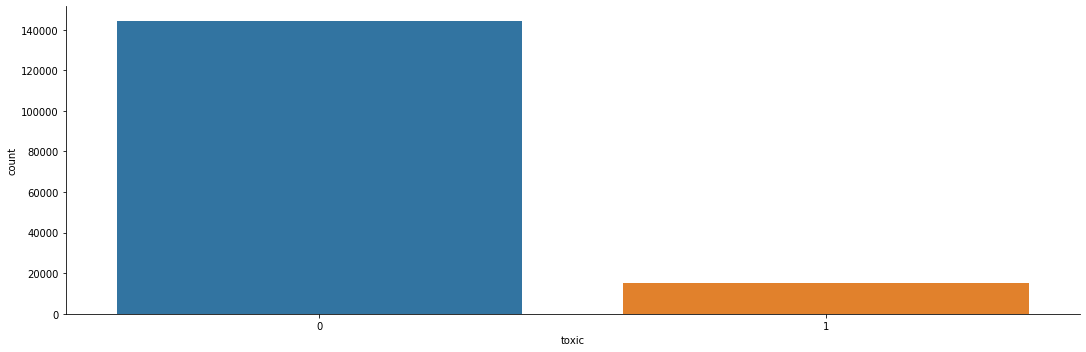

In [18]:
sns.factorplot(data=toxic_comments, kind = 'count', size=5, aspect=3, x = 'toxic')

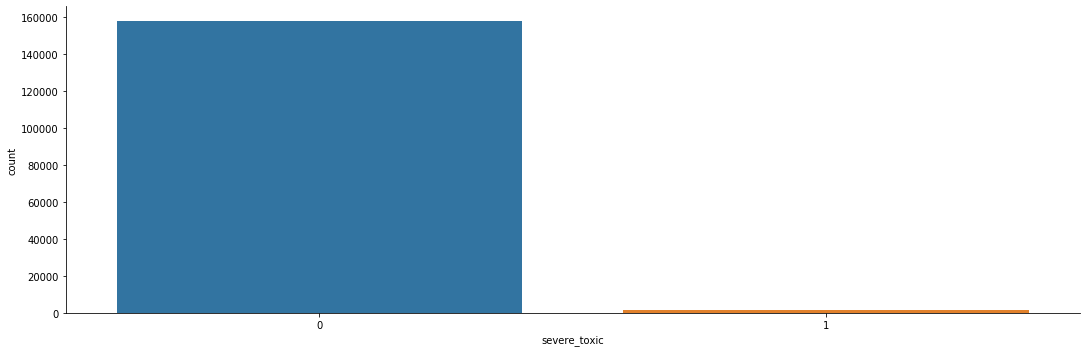

In [19]:
sns.factorplot(data=toxic_comments, kind = 'count', size=5, aspect=3, x = 'severe_toxic')

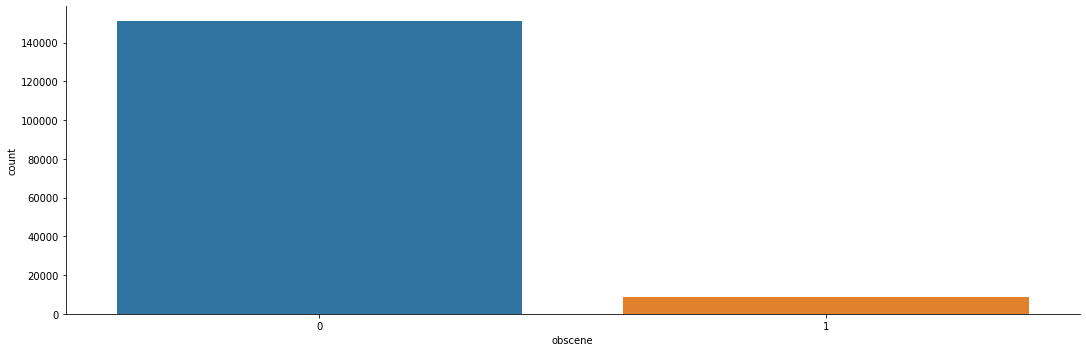

In [20]:
sns.factorplot(data=toxic_comments, kind = 'count', size=5, aspect=3, x = 'obscene')

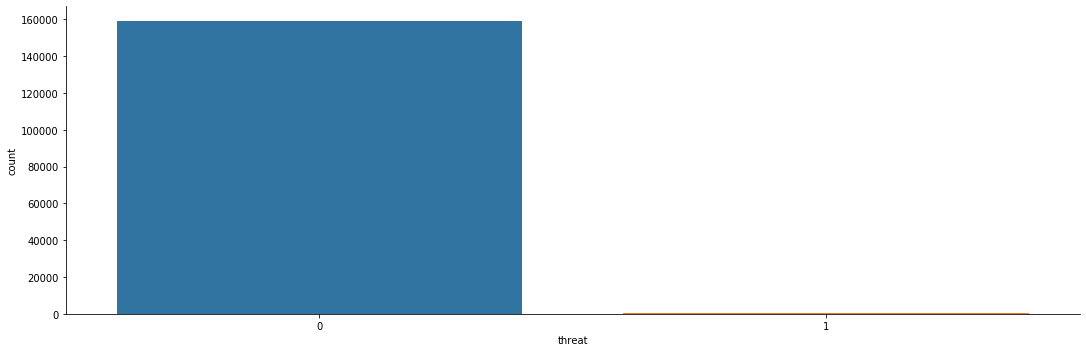

In [21]:
sns.factorplot(data=toxic_comments, kind = 'count', size=5, aspect=3, x = 'threat')

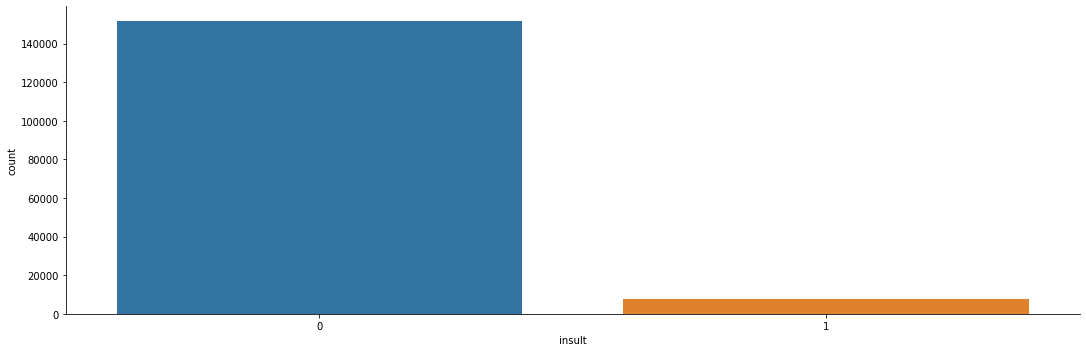

In [22]:
sns.factorplot(data=toxic_comments, kind = 'count', size=5, aspect=3, x = 'insult')

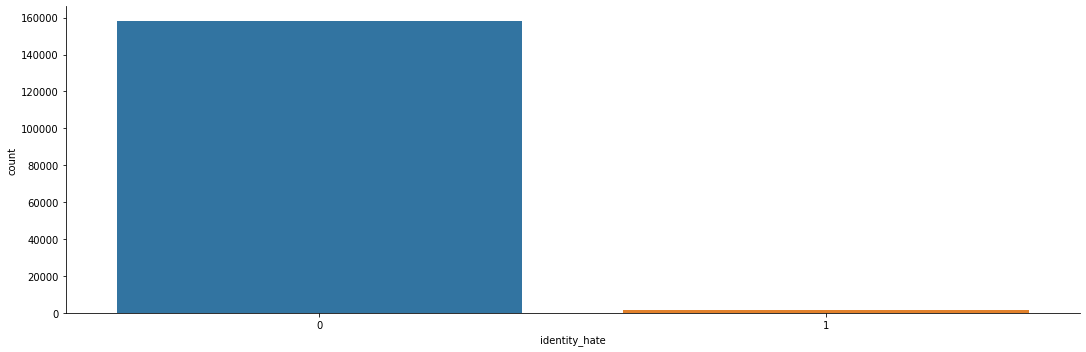

In [23]:
sns.factorplot(data=toxic_comments, kind = 'count', size=5, aspect=3, x = 'identity_hate')

15294.0
1595.0
8449.0
478.0
7877.0
1405.0
143346.0


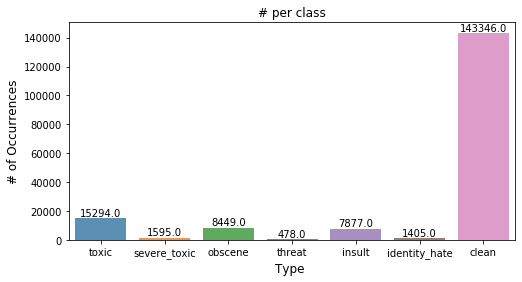

In [24]:
x=toxic_comments.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    print(label)
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [25]:
x=rowsums.value_counts()
print(x)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64


# Comments with Multi Tags

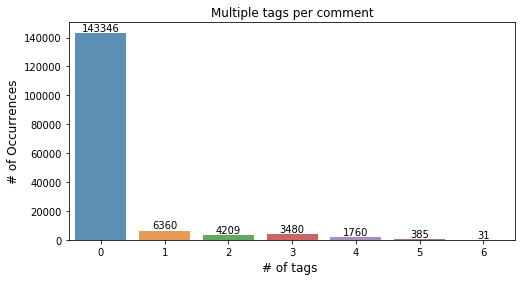

In [26]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [27]:
stopword=set(STOPWORDS)

# Wordcloud

In [28]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Wordcloud for Clean Comments

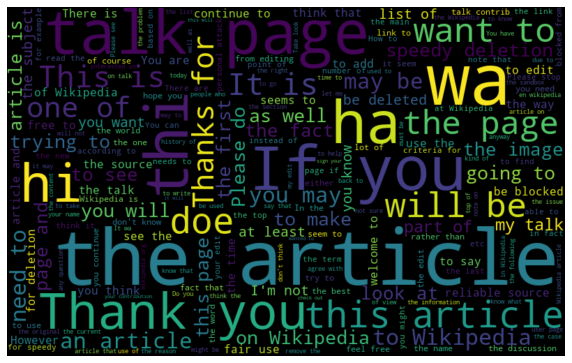

In [29]:
subset=toxic_comments[toxic_comments.clean==True]
text=subset.comment_text.values
words =" ".join(text)
create_wordcloud(words)

# Wordcloud for toxic comments

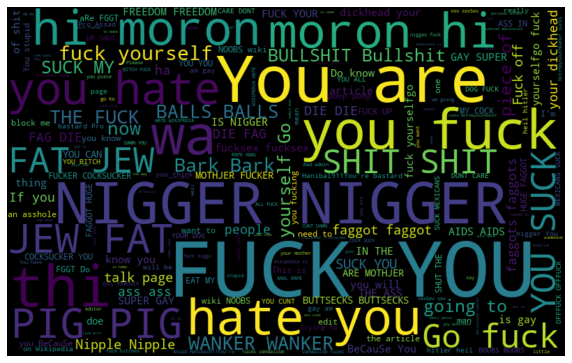

In [30]:
subset=toxic_comments[toxic_comments.toxic==1]
text=subset.comment_text.values
words =" ".join(text)
create_wordcloud(words)

# Wordcloud for Severe Toxic Comments

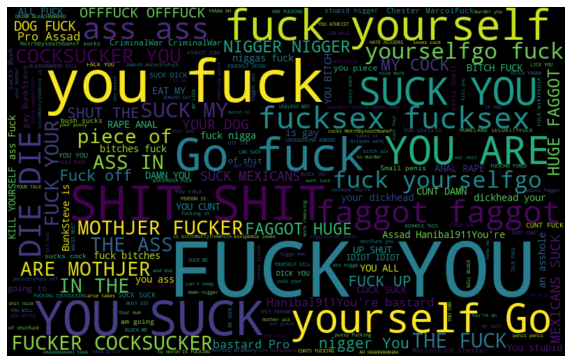

In [31]:
subset=toxic_comments[toxic_comments.severe_toxic==1]
text=subset.comment_text.values
words =" ".join(text)
create_wordcloud(words)

# Wordcloud for Threat Comments

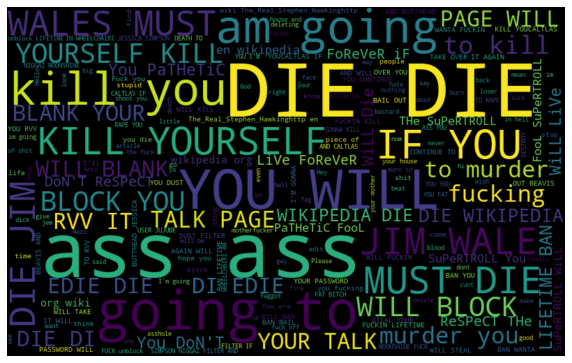

In [32]:
subset=toxic_comments[toxic_comments.threat==1]
text=subset.comment_text.values
words =" ".join(text)
create_wordcloud(words)

# Wordcloud for insult comments

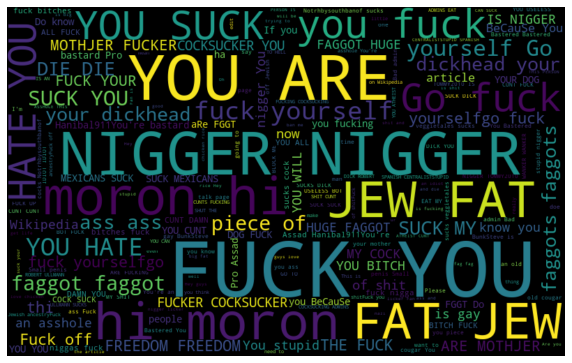

In [33]:
subset=toxic_comments[toxic_comments.insult==1]
text=subset.comment_text.values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

In [34]:
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

In [35]:
def tokenize(text):
   
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]
    return words

# Featue EXtraction Using TF-IDF

In [36]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X = vector.fit_transform(toxic_comments['comment_text'])

In [37]:
vector.get_feature_names()[0:20]

['aaa',
 'aap',
 'aardvark',
 'aaron',
 'aba',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbas',
 'abbey',
 'abbott',
 'abbreviated',
 'abbreviation',
 'abc',
 'abcnews',
 'abd',
 'abducted',
 'abduction',
 'abdul']

In [38]:
labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

In [39]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score

In [41]:
scores = []
for class_name in labels:
    train_target = toxic_comments[class_name]
    X_train, X_test, y_train, y_test = train_test_split(X, toxic_comments[class_name], test_size = 0.2, random_state=0)
    
    classifier = LogisticRegression(C=0.1, solver='sag')

    cv_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

CV score for class toxic is 0.9549463230086405
CV score for class severe_toxic is 0.9829992661696719
CV score for class obscene is 0.9763063786170183
CV score for class threat is 0.9713137363142379
CV score for class insult is 0.9693513170027285
CV score for class identity_hate is 0.9692295780712511


In [44]:
scores = []
for class_name in labels:
    train_target = toxic_comments[class_name]
    X_train, X_test, y_train, y_test = train_test_split(X, toxic_comments[class_name], test_size = 0.2, random_state=0)
    
    classifier = RandomForestClassifier()

    cv_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

CV score for class toxic is 0.9568954855881966
CV score for class severe_toxic is 0.9648369280520049
CV score for class obscene is 0.977739538380813
CV score for class threat is 0.8882187889766051
CV score for class insult is 0.9665790117734757
CV score for class identity_hate is 0.9312542389345378


In [45]:
scores = []
for class_name in labels:
    train_target = toxic_comments[class_name]
    X_train, X_test, y_train, y_test = train_test_split(X, toxic_comments[class_name], test_size = 0.2, random_state=0)
    
    classifier = KNeighborsClassifier()

    cv_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

CV score for class toxic is 0.6816547774664973
CV score for class severe_toxic is 0.7204805876192286
CV score for class obscene is 0.7035446109936224
CV score for class threat is 0.6190897556241278
CV score for class insult is 0.6926653813582325
CV score for class identity_hate is 0.6300254508997135


In [46]:
scores = []
for class_name in labels:
    train_target = toxic_comments[class_name]
    X_train, X_test, y_train, y_test = train_test_split(X, toxic_comments[class_name], test_size = 0.2, random_state=0)
    
    classifier = DecisionTreeClassifier()

    cv_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

CV score for class toxic is 0.826507102852466
CV score for class severe_toxic is 0.6350116467910016
CV score for class obscene is 0.8625623491114758
CV score for class threat is 0.6154883987715455
CV score for class insult is 0.7886443725098053
CV score for class identity_hate is 0.6631279921757013
